# Film thickness control / estimate

In the liquid film of beet juice, I observed that the relaxation time after disturbance is dependent on the film thickness. Such dependence could be a qualitative way to estimate the surface thickness. In this notebook, I present the "calibration" of this film thickness estimate.

## Theory

The process of an ununiform liquid film smoothing out can be modeled by a diffusion-like process:

$$
\frac{\partial h}{\partial t} = D \nabla^2 h,
$$

where $D = \gamma / \mu$ is the diffusion coefficient.

The solution of flim height would be an exponential decay:

$$
h(t) = h_0 e^{-t/\tau},
$$

where $\tau = L^2 / 2D$ is the relaxation time. Here, $L$ represents a characteristic length scale of the system, typically the thickness of the film.

With these information, we can have a rough idea of how relaxation time depends on film thickness.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'h (m)')

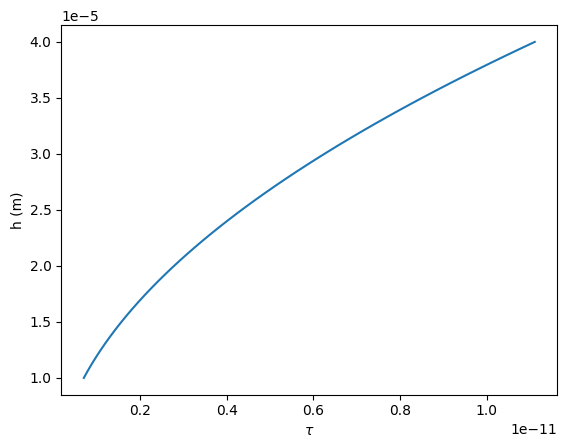

In [3]:
h = np.linspace(10, 40) * 1e-6 # m
gamma = 72e-3 # N/m
mu = 1e-3 # Pa s
tau = h**2 / 2 / (gamma/mu)

plt.plot(tau, h)
plt.xlabel("$\\tau$")
plt.ylabel("h (m)")

This model suggests that thinner film relaxes faster, which contradict my observation. What's behind this? I think it's the gravity effect, which is not taken into account in the model. When is gravity not negligible compared to surface tension? 

The capillary length of water is 

$$
\lambda_c = \sqrt{\frac{\gamma}{\rho g}} = 0.0027 \;\mathrm{m}
$$

This is the thickness, above which gravity should take over the dynamics. However, the thin films we are concerned about are not even 100 $\mu$m, much thinner than the capillary length. Actually, this is how thin films are formed. So it is not gravity.

Is it viscosity? We can balance the viscous force and surface tension force roughly as

$$
\mu \frac{v}{h} = \frac{\gamma}{L},
$$

which gives a velocity

$$
v = \frac{\gamma}{\mu L}h.
$$

In this equation, velocity $v$ increases with film height $h$, agreeing with the observation. Instead of using the relaxation time as the indicator of thickness, we can use the initial velocity after the disturbance. The equation above predicts that the velocity increases linearly with film thickness. 

## Experimental data

We choose the red color front as the film location indicator. We will measure a short sequence of location vs. time, and then compute velocity. 